In [1]:
%reload_ext autoreload
%autoreload 2

from src.db_manager import DB
import pandas as pd
from src.backtest import Backtest
from src.pattern import Bollinger, Default

# DB 작업

In [ ]:
DB().collect_stock()

build:   0%|          | 0/3757 [00:00<?, ?it/s]

In [ ]:
DB().build_stock()

build_fields:   0%|          | 0/8 [00:00<?, ?it/s]

In [13]:
# DB().build_market(market='kospi')
DB().build_market(market='kosdaq')

PosixPath('/mnt/c/Users/USER/Documents/GitHub/metricstudio/db/market/kosdaq.parquet')

In [14]:
pd.read_parquet("db/market/kosdaq.parquet")

,open,high,low,close,volume,amount,marketcap
date,,,,,,,
2000-01-04,2583.80,2682.60,2528.50,2660.00,64949798,1771548428480,96090266801440
2000-01-05,2561.60,2635.80,2532.30,2629.50,106351398,2116230548510,92811544154090
2000-01-06,2670.50,2684.10,2396.50,2475.20,109938191,3166068058590,88221188507150
2000-01-07,2301.30,2324.90,2249.50,2276.60,102453948,1563155814200,81174417784090
2000-01-10,2363.00,2363.80,2184.10,2310.80,94751859,2466018199530,78434076716540
...,...,...,...,...,...,...,...
2026-02-03,1135.94,1144.40,1119.65,1144.33,1166572714,14808754555546,627843575425121
2026-02-04,1139.02,1158.74,1136.73,1149.43,1179457276,13676678433558,630262936357408
2026-02-05,1137.08,1143.21,1104.63,1108.41,1370412413,14122636405365,608227766671486


In [3]:
pd.read_parquet("db/close.parquet")

,000010,000020,000030,000040,000050,000060,000070,000080,000100,000120,...,900150,900180,900250,900260,900270,900280,900290,900300,900310,900340
date,,,,,,,,,,,,,,,,,,,,,
1999-12-28,3700.0,2710.0,3840.0,97024.0,NaN,836.0,7752.0,3930.0,2611.0,45739.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4050.0,3116.0,4150.0,111028.0,1694.0,878.0,8153.0,4515.0,2824.0,50211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3925.0,3305.0,3950.0,127032.0,1651.0,1009.0,8153.0,4190.0,2772.0,51227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3600.0,2871.0,3500.0,136034.0,1723.0,977.0,8086.0,4200.0,2590.0,48381.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3800.0,3296.0,3600.0,122030.0,1644.0,982.0,8487.0,4000.0,2711.0,49601.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-23,NaN,6410.0,NaN,476.0,9410.0,NaN,62100.0,18980.0,116200.0,93700.0,...,NaN,NaN,703.0,1571.0,192.0,NaN,3090.0,265.0,577.0,827.0
2025-12-24,NaN,6430.0,NaN,481.0,9080.0,NaN,62000.0,19000.0,115200.0,95200.0,...,NaN,NaN,710.0,1571.0,201.0,NaN,3065.0,262.0,574.0,811.0
2025-12-26,NaN,6380.0,NaN,474.0,9480.0,NaN,63000.0,18940.0,112700.0,94400.0,...,NaN,NaN,713.0,1571.0,199.0,NaN,3020.0,255.0,572.0,792.0


In [11]:
import FinanceDataReader as fdr

# KOSPI Index 코스피 지수 데이터 
kospi = fdr.DataReader('KS11', '2000'); kospi

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2000-01-04,1028.33,1066.18,1016.59,1059.04,195898660,0.0301,1,30.97,3771013000000,NaN
2000-01-05,1006.87,1047.70,984.05,986.31,257696170,-0.0687,2,-72.73,4798126000000,NaN
2000-01-06,1013.95,1014.90,953.50,960.79,203523570,-0.0259,2,-25.52,3726898000000,NaN
2000-01-07,949.17,970.16,930.84,948.65,215664150,-0.0126,2,-12.14,3696686000000,NaN
2000-01-10,979.67,994.94,965.02,987.24,240175480,0.0407,1,38.59,3815037000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2026-02-03,5114.81,5288.08,5101.31,5288.08,672610151,0.0684,1,338.41,30015961619294,4.372100e+15
2026-02-04,5260.71,5376.92,5243.11,5371.10,789920328,0.0157,1,83.02,30433498214654,4.438841e+15
2026-02-05,5251.03,5304.40,5142.20,5163.57,911910087,-0.0386,2,-207.53,32385641184187,4.264766e+15


<Axes: xlabel='Date'>

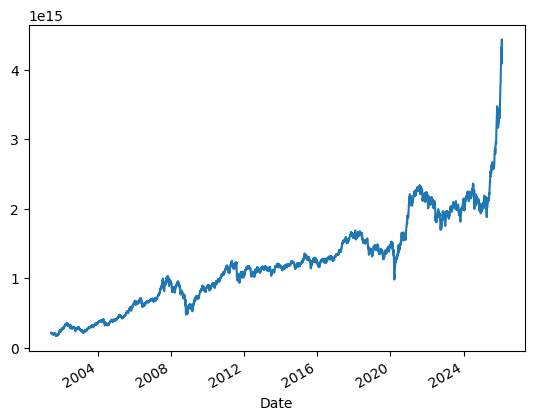

In [12]:
kospi.MarCap.plot()

# 백테스트

### 기본설정

In [2]:
start = "2000-01-01"
end = "2025-12-31"

### 모든 주식

In [3]:
bm = Default(name='모든주식')
bt = Backtest(start, end, benchmark=bm)
stats = bt.run()
stats.to_frame()

모든주식 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

count  arith_mean  geom_mean  rise_prob
pattern period scope                                                
모든주식    1W     overall  11490693.0    0.002614  -0.001247   0.462506
        2W     overall  11459341.0    0.005276  -0.002242   0.463692
        3W     overall  11432267.0    0.007980  -0.003186   0.463306
        1M     overall  11410343.0    0.010665  -0.004152   0.461397
        2M     overall  11332168.0    0.020445  -0.008009   0.459408
        3M     overall  11257941.0    0.029266  -0.011834   0.456440
        6M     overall  11042527.0    0.058772  -0.020638   0.451731

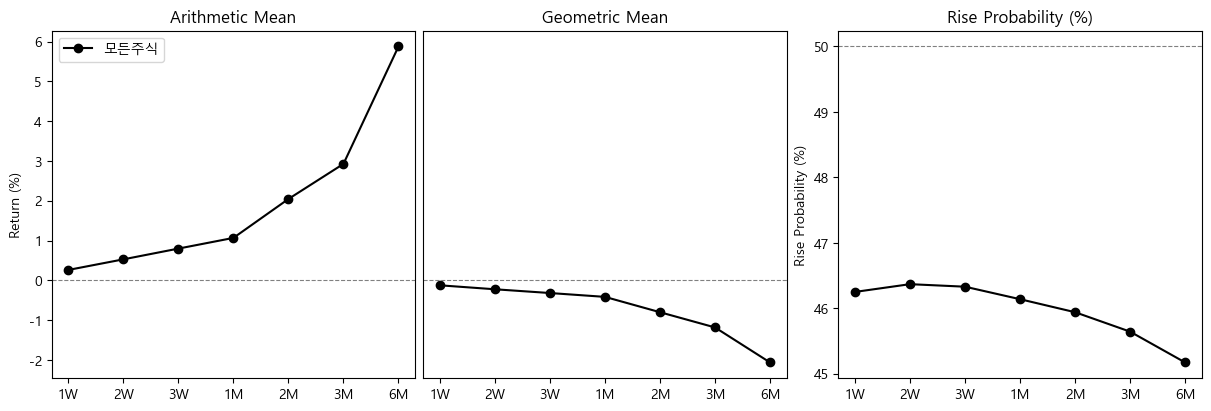

In [4]:
stats.plot(start=start, end=end);

### 모든 주식 - 상하위 제거

상하위 1% 제외 | trim:   0%|          | 0/6409 [00:00<?, ?it/s]

상하위 5% 제외 | trim:   0%|          | 0/6409 [00:00<?, ?it/s]

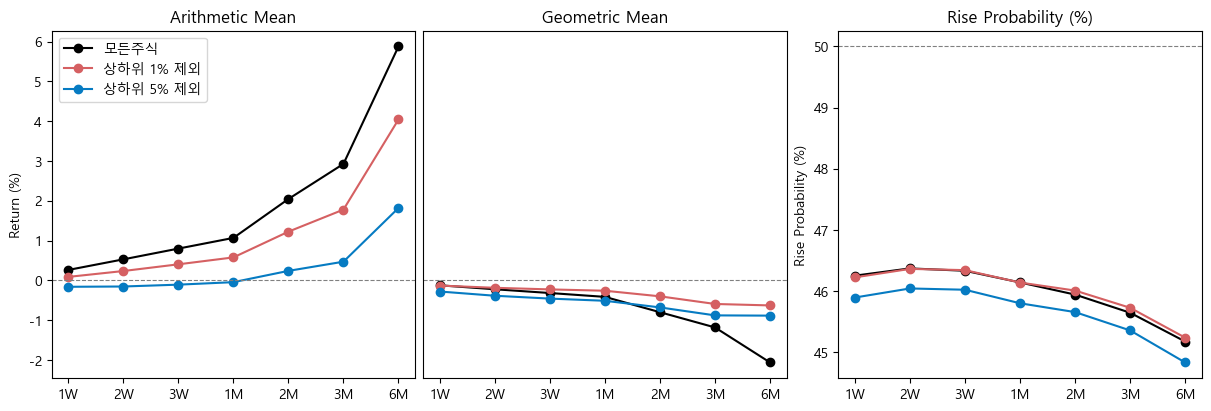

In [41]:
stats = bt.run(
    Default(name="상하위 1% 제외", trim=0.01),
    Default(name="상하위 5% 제외", trim=0.05),
)
stats.plot();

### 볼린저

In [5]:
boll = Bollinger(bandwidth=0.03, bandwidth_stay_days=5, name='볼린저패턴').high(window=252, threshold=0.90)
stats = bt.run(boll)
stats.to_frame()

볼린저패턴 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

count  arith_mean  geom_mean  rise_prob
pattern period scope                                                
모든주식    1W     overall  11490693.0    0.002614  -0.001247   0.462506
        2W     overall  11459341.0    0.005276  -0.002242   0.463692
        3W     overall  11432267.0    0.007980  -0.003186   0.463306
        1M     overall  11410343.0    0.010665  -0.004152   0.461397
        2M     overall  11332168.0    0.020445  -0.008009   0.459408
        3M     overall  11257941.0    0.029266  -0.011834   0.456440
        6M     overall  11042527.0    0.058772  -0.020638   0.451731
볼린저패턴   1W     overall      6451.0    0.007438   0.006241   0.486591
        2W     overall      6406.0    0.012375   0.010141   0.502654
        3W     overall      6368.0    0.016822   0.013547   0.507538
        1M     overall      6340.0    0.020197   0.015876   0.519716
        2M     overall      6227.0    0.037495   0.026462   0.540870
        3M     overall      6145.0    0.051082   0.033326   0.553621
        6M     overall      6003.0    0.098375   0.063499   0.579044

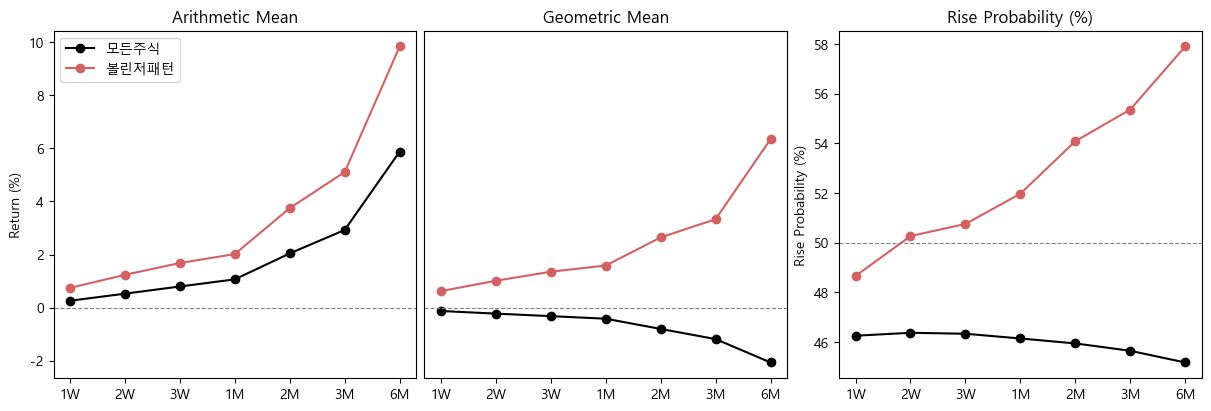

In [6]:
stats.plot(start='2000-01-01', end='2025-12-31');

(<Figure size 300x300 with 1 Axes>,
 <Axes: title={'center': 'Pattern Occurrence (Rolling 60D Mean)'}, ylabel='Daily Occurrence Count'>)

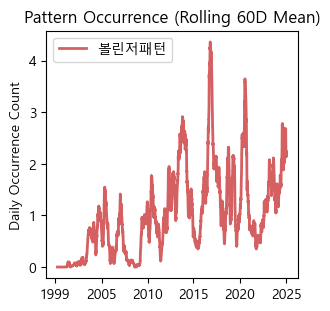

In [7]:
stats.plot_occurrence(patterns=['볼린저패턴'], ma_window=60)

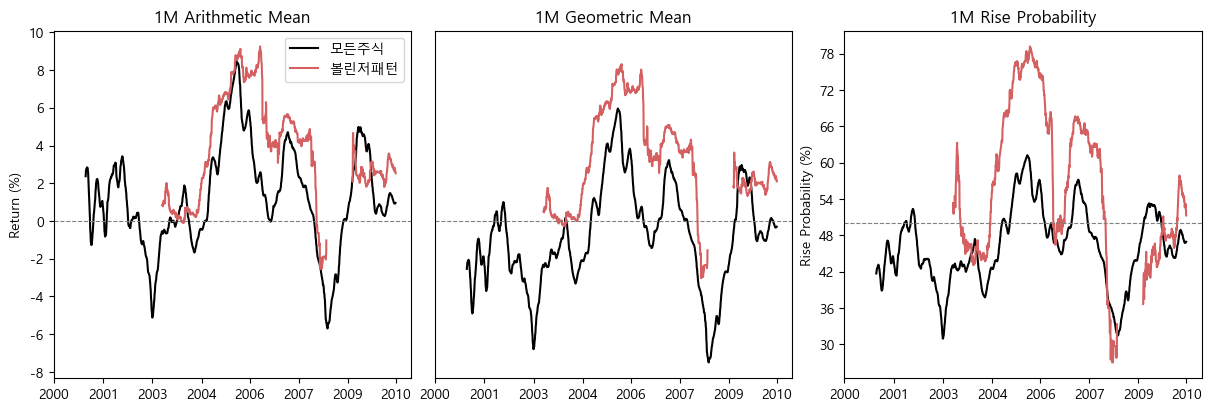

In [39]:
stats.plot_history(horizon='1M', start='2000-01-01', end='2010-12-31');

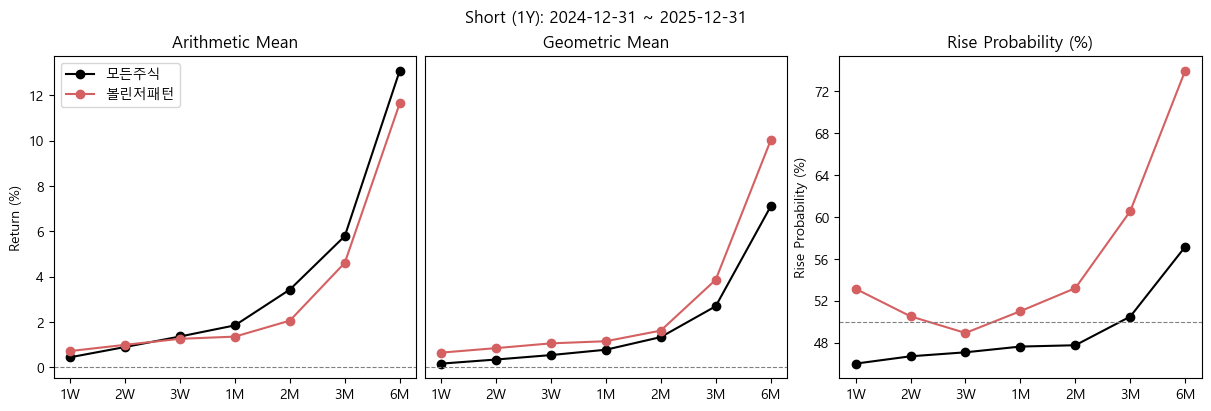

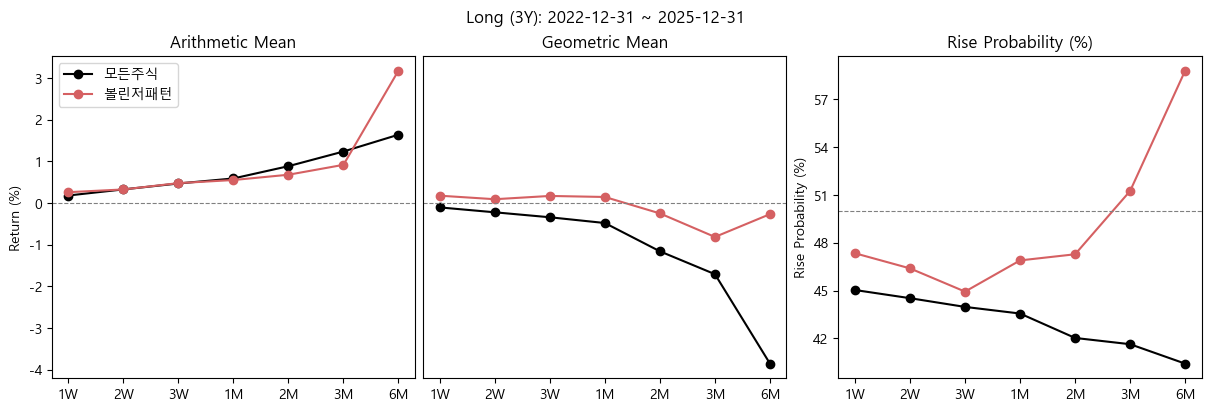

In [40]:
stats.plot_compare(asof="2025-12-31", short="1Y", long="3Y");

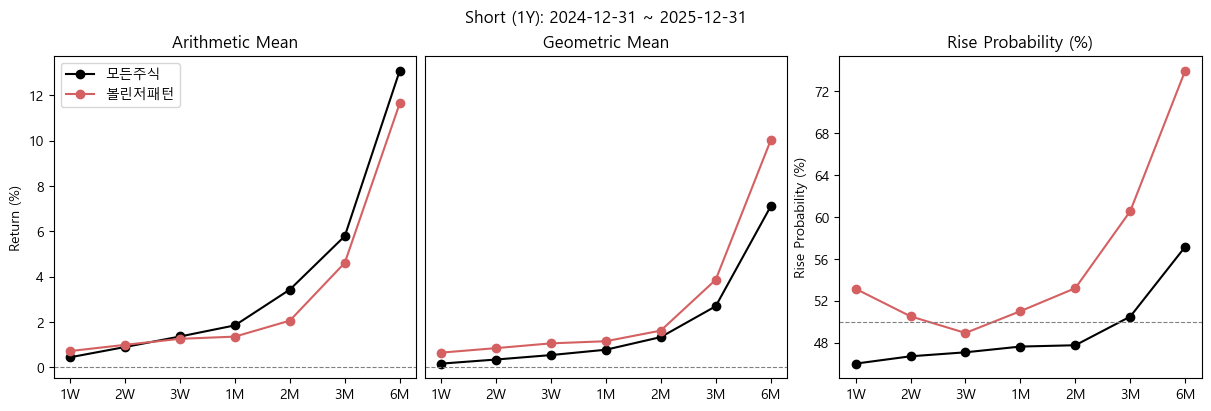

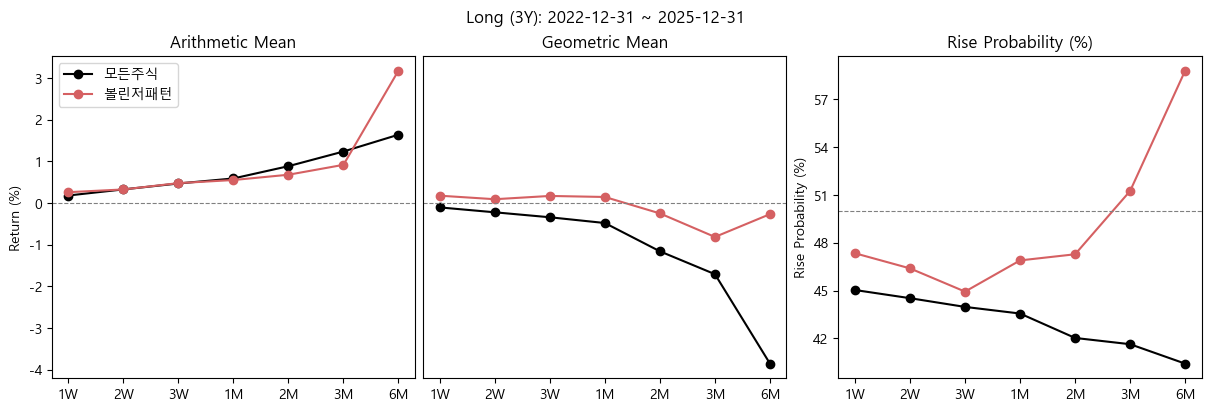

In [9]:
stats.plot_compare(asof="2025-12-31", short="1Y", long="3Y");